## 1. Hands-On: Simple Generative Model (Sine Wave Generation)

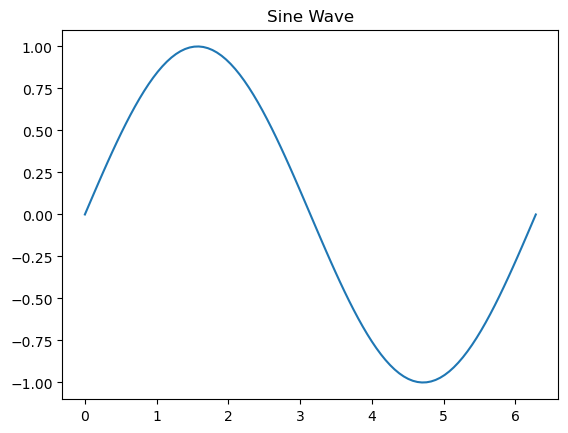

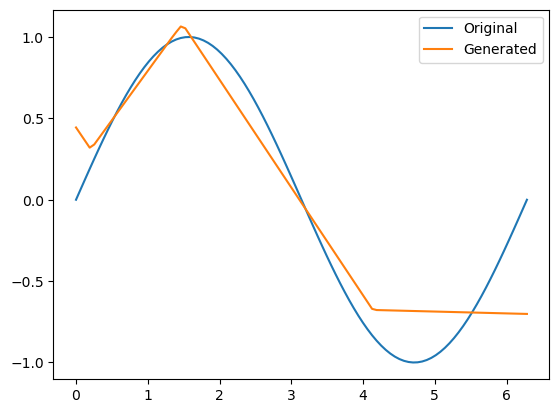

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sine wave data
x = np.linspace(0, 2 * np.pi, 100)  # Create 100 points between 0 and 2π
y = np.sin(x)  # Compute the sine of each point in x

# Plot sine wave
plt.plot(x, y)  # Plot the original sine wave
plt.title("Sine Wave")  # Add a title to the plot
plt.show()  # Display the plot

# Import PyTorch for creating and training the neural network
import torch
import torch.nn as nn

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()  # Call the constructor of the parent class (nn.Module)
        self.fc1 = nn.Linear(1, 10)  # First fully connected layer: 1 input -> 10 hidden units
        self.fc2 = nn.Linear(10, 1)  # Second fully connected layer: 10 hidden units -> 1 output

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation after the first layer
        x = self.fc2(x)  # Pass the output through the second layer
        return x  # Return the output

# Prepare the training data
x_train = x.reshape(-1, 1).astype(np.float32)  # Reshape x to a column vector and convert to float32
y_train = y.reshape(-1, 1).astype(np.float32)  # Reshape y to a column vector and convert to float32

# Convert the numpy arrays to PyTorch tensors
x_train = torch.tensor(x_train)  # Convert x_train to a tensor
y_train = torch.tensor(y_train)  # Convert y_train to a tensor

# Initialize the neural network model
model = SimpleNN()  # Create an instance of the SimpleNN class

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Use Mean Squared Error (MSE) as the loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Use Adam optimizer with a learning rate of 0.01

# Training loop
for epoch in range(1000):  # Train for 1000 epochs
    optimizer.zero_grad()  # Clear the gradients from the previous step
    output = model(x_train)  # Get the model's predictions for the training data
    loss = criterion(output, y_train)  # Compute the loss between predictions and actual values
    loss.backward()  # Backpropagate the loss to compute gradients
    optimizer.step()  # Update the model's parameters using the gradients

# After training, use the model to generate predictions
with torch.no_grad():  # Disable gradient computation since we're only making predictions
    y_pred = model(x_train).numpy()  # Get the model's predictions and convert them to a numpy array

# Plot the original sine wave and the generated sine wave
plt.plot(x, y, label="Original")  # Plot the original sine wave
plt.plot(x, y_pred, label="Generated")  # Plot the sine wave generated by the model
plt.legend()  # Add a legend to the plot
plt.show()  # Display the plot


## 2. Hands-On: Autoencoder for Image Reconstruction (MNIST)

Epoch [1/5], Loss: 0.0375
Epoch [2/5], Loss: 0.0335
Epoch [3/5], Loss: 0.0399
Epoch [4/5], Loss: 0.0347
Epoch [5/5], Loss: 0.0335


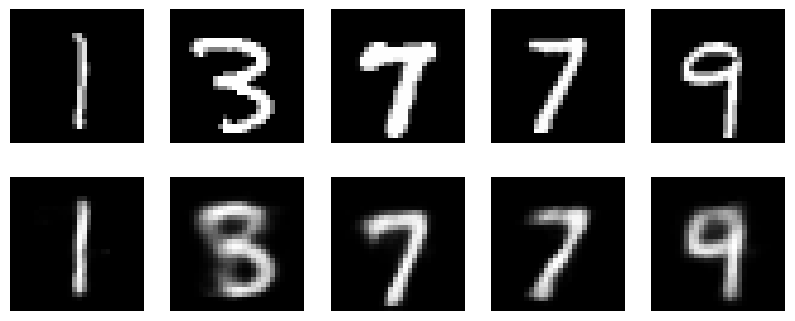

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Load the MNIST dataset
# The dataset is transformed into tensors for PyTorch processing
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# DataLoader wraps the dataset and provides batches of data
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=64, shuffle=True)

# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()  # Call the constructor of the parent class (nn.Module)
        
        # Encoder: reduces the input to a lower-dimensional representation (latent space)
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),  # Input layer: 28x28=784 input features to 128 neurons
            nn.ReLU(),  # Apply ReLU activation function
            nn.Linear(128, 64),  # 128 neurons to 64 neurons
            nn.ReLU(),
            nn.Linear(64, 12),  # 64 neurons to 12 neurons
            nn.ReLU(),
            nn.Linear(12, 3)  # Final encoding layer: 12 neurons to 3 neurons (3-dimensional latent space)
        )
        
        # Decoder: reconstructs the input from the lower-dimensional latent space
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),  # Input layer: 3-dimensional latent space to 12 neurons
            nn.ReLU(),
            nn.Linear(12, 64),  # 12 neurons to 64 neurons
            nn.ReLU(),
            nn.Linear(64, 128),  # 64 neurons to 128 neurons
            nn.ReLU(),
            nn.Linear(128, 28*28),  # Output layer: 128 neurons to 28x28=784 output features
            nn.Sigmoid()  # Apply Sigmoid to output values between 0 and 1 (to match image pixel range)
        )

    def forward(self, x):
        x = self.encoder(x)  # Pass the input through the encoder
        x = self.decoder(x)  # Pass the encoded data through the decoder
        return x  # Return the reconstructed output

# Initialize the model, loss function, and optimizer
model = Autoencoder()  # Create an instance of the Autoencoder
criterion = nn.MSELoss()  # Use Mean Squared Error (MSE) as the loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Use Adam optimizer with a learning rate of 0.01

# Train the Autoencoder
num_epochs = 5  # Set the number of epochs (how many times the model sees the entire dataset)
for epoch in range(num_epochs):
    for data in train_loader:  # Iterate over batches of data
        img, _ = data  # img contains the image data; _ contains the labels (not needed here)
        img = img.view(img.size(0), -1)  # Flatten the image from [batch_size, 1, 28, 28] to [batch_size, 784]
        
        output = model(img)  # Get the model's reconstruction of the input
        loss = criterion(output, img)  # Calculate the loss between the original image and the reconstruction

        optimizer.zero_grad()  # Clear the gradients from the previous step
        loss.backward()  # Compute the gradients with backpropagation
        optimizer.step()  # Update the model's parameters using the optimizer

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')  # Print the loss after each epoch

# Visualize the original and reconstructed images
with torch.no_grad():  # Disable gradient computation for testing
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)  # Flatten the image
        output = model(img)  # Reconstruct the image using the trained model
        break  # Only process one batch for visualization

output = output.view(-1, 1, 28, 28)  # Reshape the reconstructed image to its original shape [batch_size, 1, 28, 28]
img = img.view(-1, 1, 28, 28)  # Reshape the original image to its original shape

# Display original and reconstructed images side by side
fig, axs = plt.subplots(2, 5, figsize=(10, 4))  # Create a 2x5 grid of subplots
for i in range(5):  # Display the first 5 images
    axs[0, i].imshow(img[i][0], cmap='gray')  # Display the original image
    axs[1, i].imshow(output[i][0], cmap='gray')  # Display the reconstructed image
    axs[0, i].axis('off')  # Hide axes for the original image
    axs[1, i].axis('off')  # Hide axes for the reconstructed image

plt.show()  # Display the plot


## 3. Hands-On: Basic GAN to Generate Digits (MNIST)

Epoch [1/5], d_loss: 0.4413, g_loss: 3.7867
Epoch [2/5], d_loss: 1.2468, g_loss: 2.6306
Epoch [3/5], d_loss: 0.0959, g_loss: 4.6155
Epoch [4/5], d_loss: 0.2434, g_loss: 3.9792


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch [5/5], d_loss: 0.0233, g_loss: 9.4851


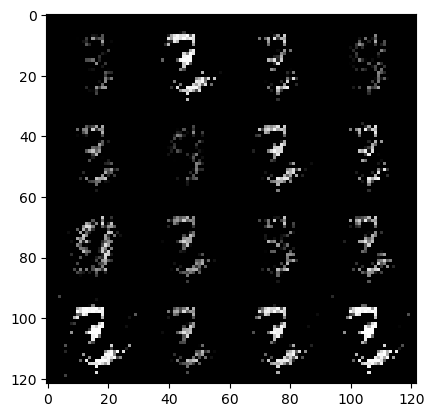

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt

# Purpose: This code implements a Generative Adversarial Network (GAN) to generate new images similar to those in the MNIST dataset.
# The MNIST dataset contains images of handwritten digits (0-9), and the GAN learns to generate similar images.

# Step 1: Data Loading and Preprocessing
# Load the MNIST dataset and apply transformations like converting images to tensors and normalizing pixel values.
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to the range [-1, 1]
])
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)  # Load the dataset in batches

# Step 2: Define the Generator Network
# The Generator takes random noise as input and generates images that resemble the MNIST digits.
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(100, 256),  # Input noise of size 100, output 256 features
            nn.ReLU(),  # Activation function
            nn.Linear(256, 512),  # Next layer with 512 features
            nn.ReLU(),  # Activation function
            nn.Linear(512, 28*28),  # Output layer producing a flattened 28x28 image
            nn.Tanh()  # Output values between -1 and 1
        )

    def forward(self, x):
        x = self.model(x)  # Forward pass through the network
        return x.view(x.size(0), 1, 28, 28)  # Reshape the output to a 1x28x28 image

# Step 3: Define the Discriminator Network
# The Discriminator classifies images as real or fake.
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),  # Input is a flattened 28x28 image, output 512 features
            nn.LeakyReLU(0.2),  # Activation function with a slight slope for negative inputs
            nn.Linear(512, 256),  # Next layer with 256 features
            nn.LeakyReLU(0.2),  # Activation function
            nn.Linear(256, 1),  # Output layer producing a single value
            nn.Sigmoid()  # Output value between 0 and 1 (probability)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the image
        return self.model(x)  # Forward pass through the network

# Step 4: Initialize the Generator and Discriminator
G = Generator()  # Create an instance of the Generator
D = Discriminator()  # Create an instance of the Discriminator

# Step 5: Define Loss Function and Optimizers
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for classification
optimizer_G = optim.Adam(G.parameters(), lr=0.0002)  # Adam optimizer for Generator
optimizer_D = optim.Adam(D.parameters(), lr=0.0002)  # Adam optimizer for Discriminator

# Step 6: Training the GAN
num_epochs = 5  # Number of times to iterate over the entire dataset
for epoch in range(num_epochs):
    for data in train_loader:
        real_images, _ = data  # Load real images from the dataset
        batch_size = real_images.size(0)
        
        # Train Discriminator on real and fake images
        optimizer_D.zero_grad()  # Zero the gradients
        labels = torch.ones(batch_size, 1)  # Real images have label 1
        outputs = D(real_images)  # Forward pass real images through Discriminator
        d_loss_real = criterion(outputs, labels)  # Calculate loss on real images
        
        noise = torch.randn(batch_size, 100)  # Generate random noise
        fake_images = G(noise)  # Generate fake images from noise using the Generator
        labels = torch.zeros(batch_size, 1)  # Fake images have label 0
        outputs = D(fake_images.detach())  # Forward pass fake images through Discriminator
        d_loss_fake = criterion(outputs, labels)  # Calculate loss on fake images
        
        d_loss = d_loss_real + d_loss_fake  # Total loss for the Discriminator
        d_loss.backward()  # Backpropagation
        optimizer_D.step()  # Update Discriminator weights
        
        # Train Generator to fool the Discriminator
        optimizer_G.zero_grad()  # Zero the gradients
        labels = torch.ones(batch_size, 1)  # Generator wants Discriminator to output 1 for fake images
        outputs = D(fake_images)  # Forward pass fake images through Discriminator
        g_loss = criterion(outputs, labels)  # Calculate loss for Generator
        
        g_loss.backward()  # Backpropagation
        optimizer_G.step()  # Update Generator weights
    
    print(f'Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}')  # Print losses

# Step 7: Generate Images After Training
with torch.no_grad():  # No need to calculate gradients for generation
    noise = torch.randn(16, 100)  # Generate random noise
    generated_images = G(noise)  # Generate images from noise using the trained Generator

# Step 8: Visualize Generated Images
grid_img = torchvision.utils.make_grid(generated_images, nrow=4)  # Arrange images in a grid
plt.imshow(grid_img.permute(1, 2, 0))  # Convert to a format suitable for display
plt.show()  # Show the generated images
